# Lunar lander

In [2]:
from typing import Dict, List, Tuple, Optional
from collections import namedtuple
import os

In [3]:
from functional import seq, pseq
from functional.streams import Sequence
from IPython.core.display import HTML

def display_seq(sequence:Sequence,rows:int)-> None:
        sequence._repr_html_= lambda :sequence.tabulate(rows,tablefmt='html')
        display(sequence)
        sequence._repr_html_= lambda :sequence.tabulate(10,tablefmt='html')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [55]:
# Assumption - 1 param used
def build_df(trials:int,prefix:str,window:int =50) -> pd.DataFrame:
    builder = []
    
    for trial in range(1,trials+1):
        t = pd.read_csv(f"lander/{prefix}{trial}.csv",header=None,names = ['param','iteration',"reward"]) 
        t['trial'] = t.reward.map(lambda x: trial)
        t['moving_avg'] = t.reward.rolling(window=window,win_type = 'triang').mean()
        
        builder.append(t.dropna())
        
    
    return pd.concat(builder) 

In [46]:
def process(ala:pd.DataFrame) -> pd.DataFrame:
    ala =  ala.drop(columns=['reward','param'])
    ala = ala.groupby(['iteration'],as_index=False).agg(['mean','std'])
    
    ala['mean'] = ala['moving_avg']['mean']
    ala['std'] = ala['moving_avg']['std']
    ala = ala[['mean','std']]#.reset_index()
    
    ala['minsus_std'] =ala['mean'] - ala['std']
    ala['plus_std'] = ala['mean'] + ala['std']
    
    ala = ala.drop(columns=['std'])
    return ala

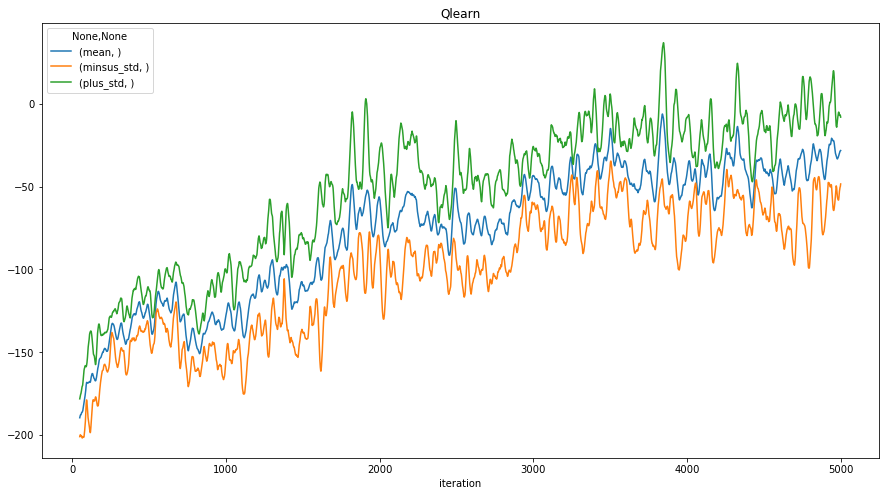

In [49]:
qlearn = process(build_df(5,prefix="chosen_"))
qlearn.plot(title="Qlearn")

In [36]:
qlearn['mean'].iloc[:-100].mean()

-77.71202935738125

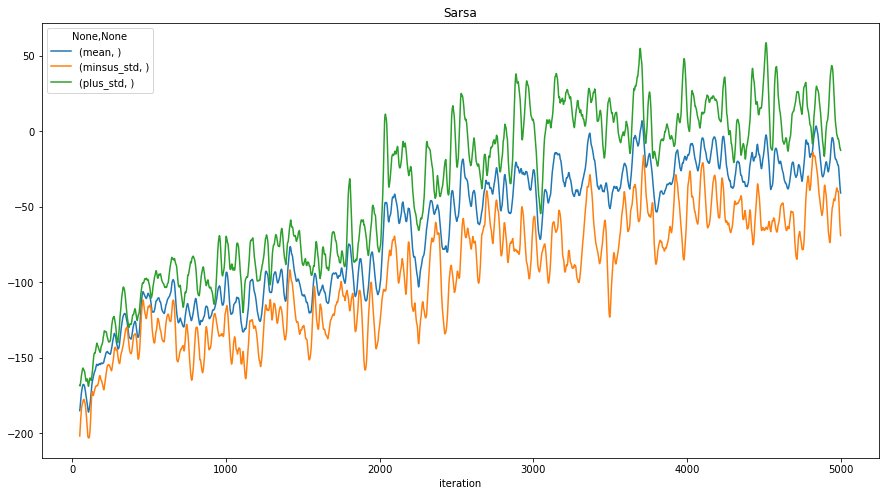

In [50]:
sarsa = process(build_df(5,prefix='chosen_sarsa_'))

sarsa.plot(title="Sarsa")

In [34]:
sarsa['mean'].iloc[:-100].mean()

-66.85064403224528

-135.39539068789708

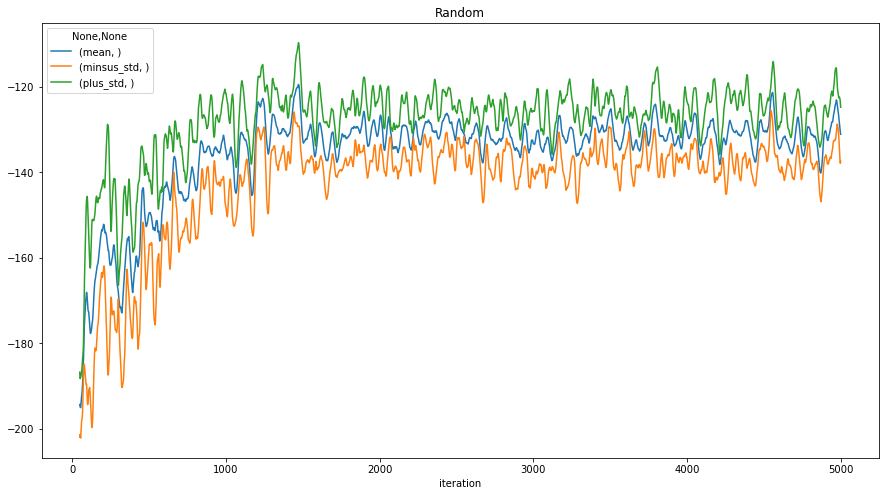

In [53]:
random_df = process(build_df(5,prefix='random_'))

random_df.plot(title="Random")
random_df['mean'].iloc[:-100].mean()

# Sarsa, 20k epochs

-31.564825126486085

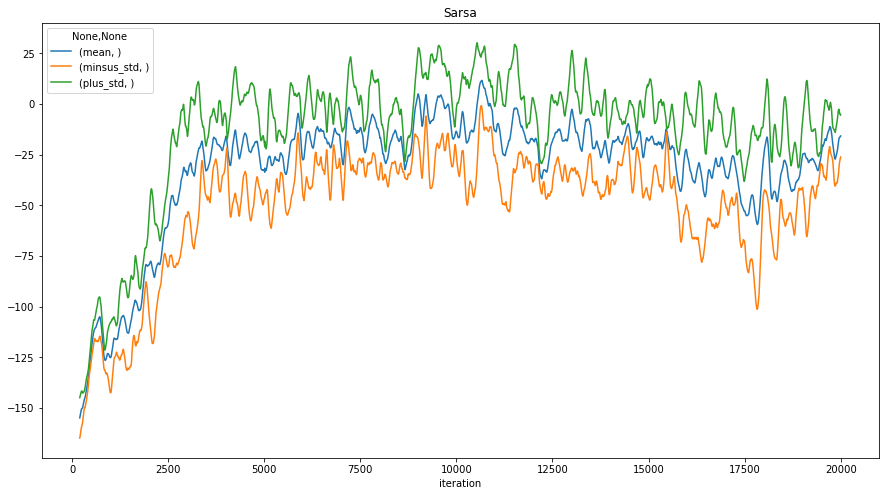

In [59]:
sarsa20 = process(build_df(5,prefix='sarsa_20_',window=200))

sarsa20.plot(title="Sarsa")
sarsa20['mean'].iloc[:-100].mean()